#Seaborn doumentation: https://seaborn.pydata.org/examples/different_scatter_variables.html
#really useful pages are 'Gallery' and 'API'
#Seaborn is a statistical plotting library and build on top of
  #MatPlotLib
  #Has beautiful default styles   
  #Works great with pandas DF objects
    
Best to plots use in presestations for a CEO or executive:          Boxplots,Countplots,BarPlots.

Other plots like ViolinPlots, SwarmPlots, and StripPlots
 are more suitable for a Data Scientist themselves
 
MatPlotLib Colormap: https://matplotlib.org/tutorials/colors/colormaps.html

In [ ]:
# Part 1 - Distribution Plots

In [ ]:
# Discuss different plot types with seaborn that allows us to
  # visualize distribution of a dataset

In [1]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# Lets get data to plot
# Seaborn comes with a few built in data sets we can load
tips = sns.load_dataset('tips')

In [15]:
tips.shape

(244, 7)

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# DIST PLOT - 1st plot type
   # allows us to show the distribution of a univaria instead of
      #observations
   # Univaria - just another way of saying 'ONE VARIABLE'    

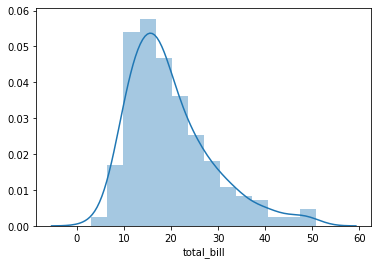

In [6]:
sns.distplot(tips['total_bill'])
# We get basically a histogram and a KDE(kernal density estimation)

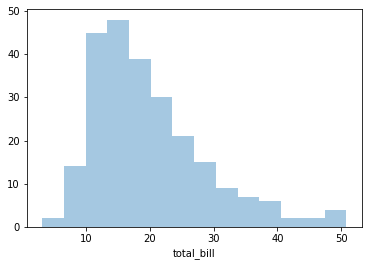

In [7]:
# Can remove KDE if we want
sns.distplot(tips['total_bill'],kde=False)
# So now we basically have a histogram where our total bill lies

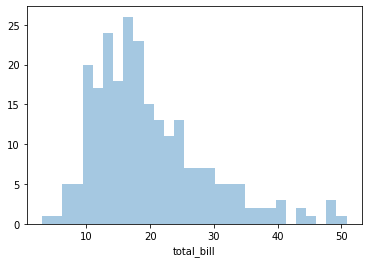

In [8]:
# Change number of bins
sns.distplot(tips['total_bill'],kde=False,bins=30)
#Most of bills between 10 and 20$

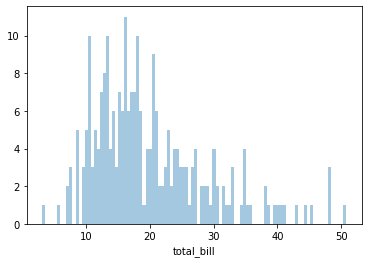

In [9]:
# Higher bins we start to plot every instance
sns.distplot(tips['total_bill'],kde=False,bins=100)

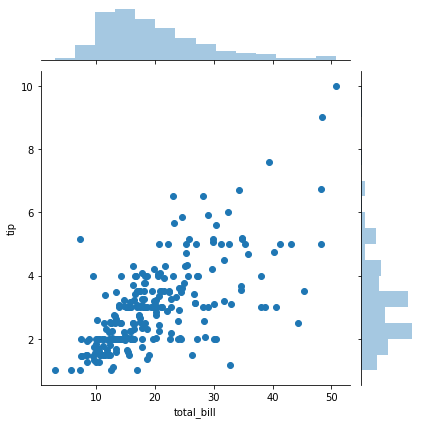

In [10]:
# Joint Plot 
   # pass in 2 columns as X and Y arguments
   # allows you to match up 2 dist plots for bivariate data
      #meaning we an combine 2 differeent distribution plots
    # Bivariate - 2 variable or 2 column
# Kind parameter - allows us to choose how we want to compare
   #the 2 distributions 
    # DEFAULT IS SCATTER - USED THE MOST
# Lets compare 'total bill' vs 'tip size'
sns.jointplot(x='total_bill',y='tip',data=tips)
# Scatterplot in middle
# Histogram outside
# this gramph makes sense bc as we get higher in total bill 
    # Tip Size increases

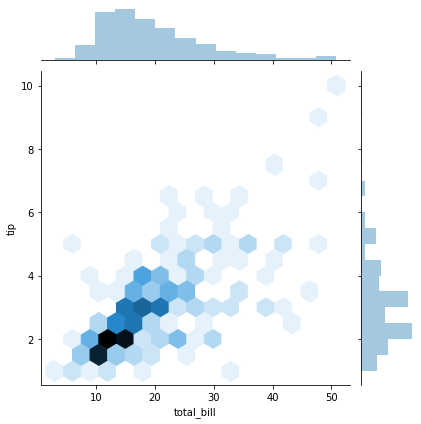

In [11]:
#HEXBIN PLOT
#Kind Parameter
# Kind pararmeter allows us to affect what is going on inside of 
  #joint plot. By default it uses scatter, but we can also pass
  # in an argument called 'HEX'
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
# So HEX is similar to Scatter except it is darker if it has 
   #more point in it

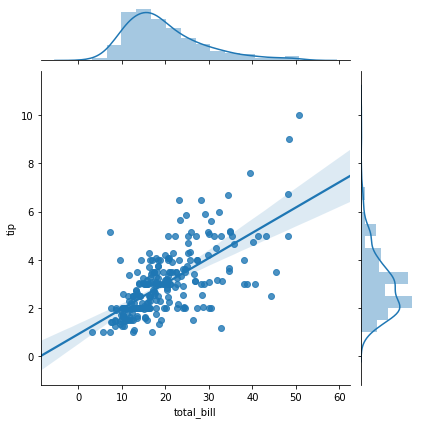

In [12]:
# Kind=Regression
# Regression looks like Scatter except seaborn draws a 
    #Regression line
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

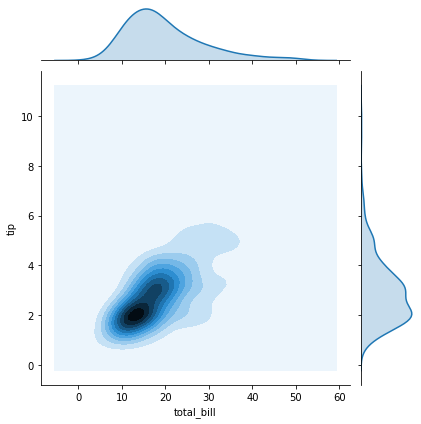

In [13]:
# Kind=KDE
  # shows density of points 
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

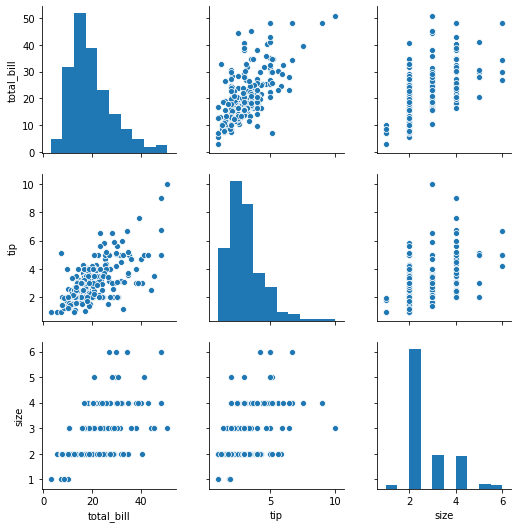

In [14]:
# Pair Plot - USED A LOT
  # builds off JOINT PLOT and is ESSENTIALLY A JOINT PLOT FOR 
    # EVERY SINGLE NUMERICAL COLUMN IN DATASET
   # Great way to quickly visualize data
 #plots pair wise relationships across entire dataframe and also
   #supports a color hue argument for categorical columns
# Pair plot does a joint plot for every possible combination 
   # of the numerical columns in the DF
sns.pairplot(tips)
# So we get pairplot for all numerical columns 
# whenwe get to a parameter vs itself like 'size vs size' instead
   # of doing a scatter plot it plots a Histogram instead

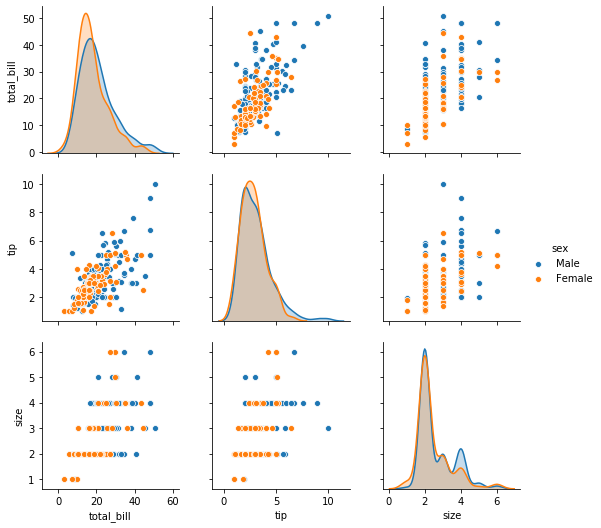

In [16]:
# Add a HUE argument to PairPlot
# Hue argument is where we would pass in a column name of a 
   # categorical column
# Categorical meaning not numerical or continues but 'categorical'
  #for ex 'Sex' column is categorical bc it has 2 categories:
     # male and female
sns.pairplot(tips,hue='sex')
 # so this will color the datapoint based off the column we put in
      #for HUE

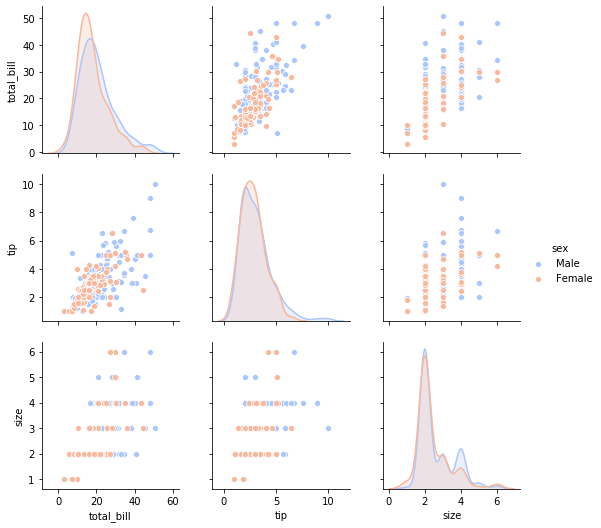

In [17]:
# PALETTE argument
   # allows you to color with specific color pallet
sns.pairplot(tips,hue='sex',palette='coolwarm')

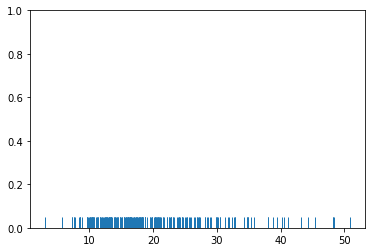

In [18]:
# RUG PLOTS
  # Not used often but helps build logic of KDE plot
  # draws a dash-mark for every point on this uniform distribution
    # ie so one single variable
# Pass in a single column
sns.rugplot(tips['total_bill'])

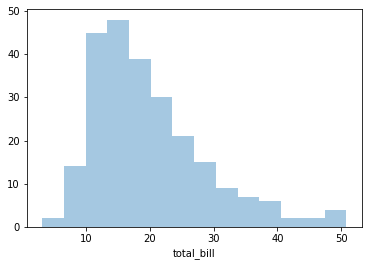

In [19]:
# Compare DIST PLOT to RUG PLOT
sns.distplot(tips['total_bill'],kde=False)
# The difference beween Dist Plot (or hist since we removed the 
   # kde) and Rug Plot is that the HIST has Bins and counts how
      #many dashes were in that bin and shows it as number. So on
      # the Rug Plot we see there are about 45 dashes for above
       # 10$

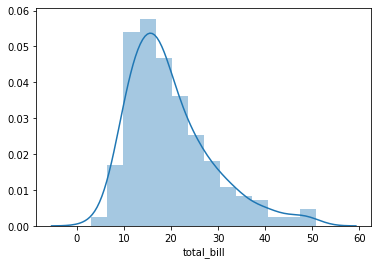

In [20]:
# We will build off Rug Plots to explain what the KDE is
sns.distplot(tips['total_bill'])

In [ ]:
# KDE plots - KERNAL DENSITY ESTIMATION PLOTS 
  #-sum of all normal distributions around a RUG PLOT

(0, 1)

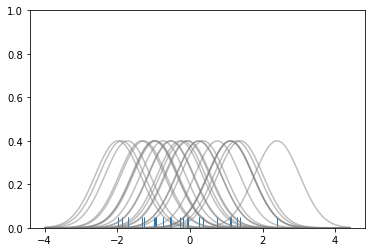

In [21]:
# Code copied from notebook (not tips just random data)
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset of random data
dataset = np.random.randn(25)

# Create another rugplot on random data
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [ ]:
#Notice above we get blue lines and the gray lines are normal 
 #distributions on top of each of the blue dash
#So every blue dash has a normal distribution(gray line) for it
# Notice we have a bunch of gray lines on top of each other
# What we will do next is sum all the normal distriutions up 
  #(gray lines) and get the KERNAL DENSITY BASES FUNCTION - which 
   #is the sum of all the normal distributions 

Text(0.5, 0.98, 'Sum of the Basis Functions')

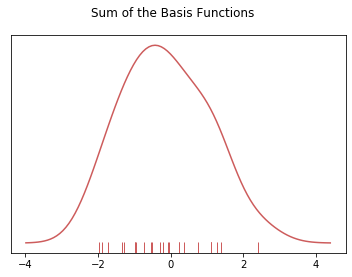

In [22]:
# Copy and pasted 2nd block of code:

# To get the kde plot we can sum these basis functions (ie normal 
    #distributions)

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [ ]:
# SO WE GET KDE PLOT ABOVE
# So once we sum up the normal distributions(done above) we get 
  #the normal KDE plot from before
# So this is how the KDE plot is constructed from the DIST PLOT
   #(the very first plot we looked at)

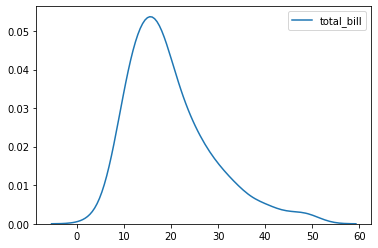

In [23]:
# KDE PLOT 
   # if we just want KDE plot and not a HIST
sns.kdeplot(tips['total_bill'])    

In [ ]:
# Video 2 - Categorical Plots

In [24]:
# We will shift out focus to plos CATEGORICAL DATA
# For categroical plots we are mainly concerned abour seeing the 
  #distributions of a categorical column such as sex, gender, 
    #smoker, day, time, and reference either to one of the
    #numerical columns or another categorical column
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


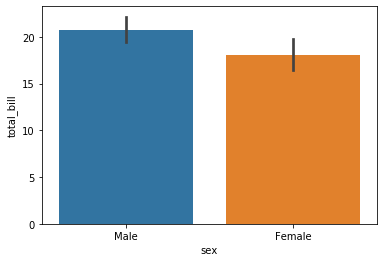

In [25]:
# BAR PLOT - Most basic categorical plot
# X-Categorical Variable Column
# Y-Numerical Column
# Estimator-(mean by default) or can pass in whatever we want 
    #or create or own
  # general plot that allows you to aggregate categorical data 
     #by some function (by default it's the MEAN). This is 
        # basically a visualization of a GROUPBY action
sns.barplot(x='sex',y='total_bill',data=tips)
# shows the average or mean of total bill for each sex
   #(ie catergorical). Average totalbill for males is higher
# We can change ESTIMATOR object if you want to affect what the 
  #actual grouping or aggregation is

In [ ]:
#ESTIMATOR Argument
# Estimator is a function that is an aggregate function. It is a 
  # statistical function to estimate within each categorical bin
     # or a visulation of a groupby mechanism
 # By default this is average or mean
 # We can also put in our own functions
 # Lets say we want Standard Deviation for gender. So do males
   # or females have more variance?

In [26]:
import numpy as np  # since we want to find Standard Dev

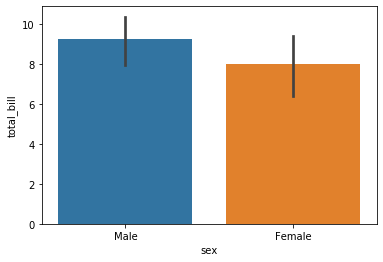

In [27]:
#ESTIMATOR Argument for Standard Deviation 
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

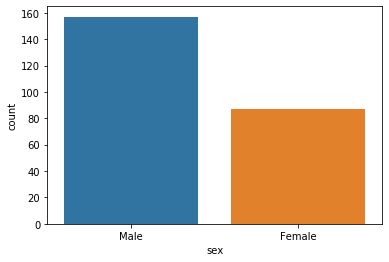

In [28]:
# COUNT PLOT - just counts occurances
  # essentially the same as a Bar Plot except estimator is 
    # COUNTING the number of occurances, because of that we only 
     # set the X value
sns.countplot(x='sex',data=tips)
# so this is same as saying Pandas.COUNT for gender
# Here we see way more males than females

In [ ]:
#BOX PLOTS and VIOLIN PLOTS
 #Used to show the distribution of Categorical data
 #Box Plot sometimes know as a Box and Whisker plot which shows
  #the distribution of quantitative data in a way that facilitates
  #comparisons between variables

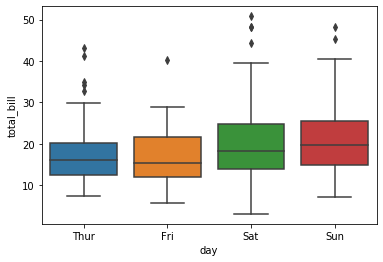

In [29]:
# BOX PLOT
 #X-Categorical
 #Y-Numerical
 #HUE-allows you to add another layer of data very smoothly
sns.boxplot(x='day',y='total_bill',data=tips)
#shows the Quartiles of the datset, whiskers extend to show the 
 #rest of the distribution except for the points that are outside 
 #of the whiskers, they're determined to be outliers. So for Thur
 #25% (or a quarter which is why they're called quartiles) of the 
 #datapoints go from end of whisker to the bottom, then another 
 #quarter go from bottom of box to middle. Dots are outliers. 

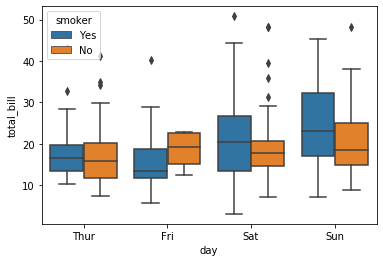

In [31]:
# BOX PLOT - SPECIFY A HUE
# HUE allows us to split up boxplot further by another 
   #catergorical column
# Add HUE for 'smoker'
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')
# So we have box plot split per day and by smoker status
# WE CAN COMPARE NOT ONLY DAY BY DAY BUT ALSO BY WHETHER THEY
   # SMOKE OR NOT
# People on friday have a larger bill if they are not a smoker 
  # vs if they are a smoker

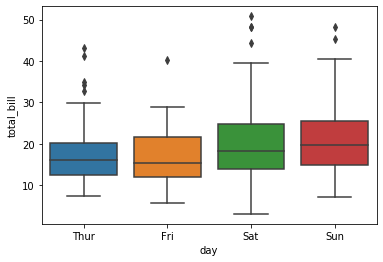

In [36]:
#Show above Box Plot just to compare the two(already made this):
sns.boxplot(x='day',y='total_bill',data=tips)

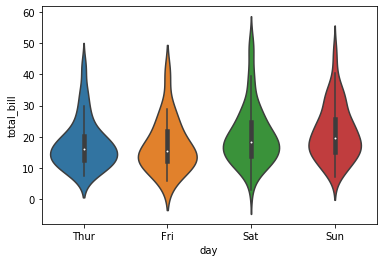

In [35]:
# VIOLIN PLOTS
  #Shows distribution of the data across some CATEGORY. Takes 
    #same arguments as boxplot
  #VIOLin PLOT plays a very similar role to a BOXPLOT
  #X-Categorical
  #Y-Numerical
sns.violinplot(x='day',y='total_bill',data=tips)

The VIOLIN PLOT unlike the BOX PLOT allows us to plot ALL of the 
compontents that correspnd to actual datapoints. It is 
essentially showing the Kernal Density Estimation of the 
underlying distribution. This is essentially just showing if we 
kinda split this in half, the distribution of the points on its 
SIDE. This allows you to reveal even more info about the datapoints themselves. The cost comes at the fact that a VIOLIN plot is a little harder to interpret or read vs a BOX PLOT. BOX PLOT is very easy to read and can quickly tell roughly where data 
compares on a category. VIOLIN PLOTS give you a lot more 
information as far as the distribution of all the points 
themselves, but comes at the cost of spending more time looking 
at it and understanding it. So 2 plots are similar just VIOLIN 
plot shows more information. Sometimes this information can be 
hidden from you if you ar just using a boxplot. VIOLIN plot also 
has option to do HUE   

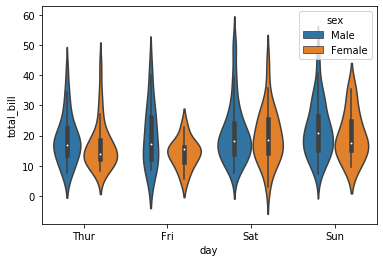

In [37]:
# VIOLIN PLOT - HUE
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')
# What is interesting about Violin Plot vs Box Plot is as another
  #argument instead of putting 2 Violin plots next to each other
   #since violin info doubled up you can have one half be one 
     #hue anad other half be another using SPLIT

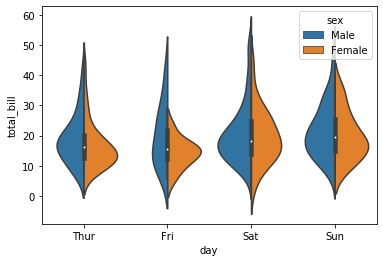

In [38]:
# VIOLIN PLOT - SPLIT HUE
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)
# Here we have a lot more info
# Now we can directly compare distributions based off another 
#category AND see how categories themselves on X-axis compare to 
#each other. Granted this comes again at the cost that you have to 
#spend more time looking at visualzation. You have to know your 
#audience and know what is appropriate when using seaborn and 
#these advanced visualizations. If dealing with a CEO Boxplot is 
#correct choice(unless you find something interesting in the 
#Violin Plot) but if dealing with a Data Scientist maybe Violin 
#Plot is better 

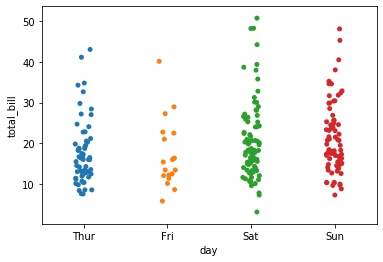

In [39]:
# STRIP PLOT
 #Draws a scatter plot based off a category
 #One issue with a STRIP PLOT is we can't tell how many points are
   #stacked on top of each other. What you can do is add another
    #argument called JITTER-allows to see density of points better
#BOX PLOT harder to interpret vs a BOX PLOT or a VIOLIN PLOT. Some
 #people like to combine the idea of a Strip Plot vs a Violin Plot
  # and create a SWARM PLOT. Seaborn allows you to do this.  
 #Can add HUE arguments 
 #SPLIT argument(just like on violin plot)-splits colors based on
       #HUE argument
 #X-Categorical
 #Y-Numerical
 #JITTER adds random noise to separate some of the stacked points
sns.stripplot(x='day',y='total_bill',data=tips)    

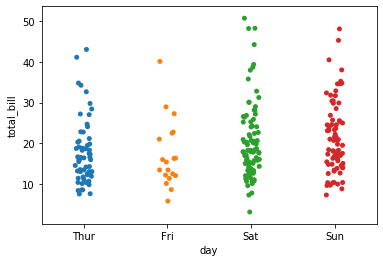

In [41]:
# STRIP PLOT - Add JITTER argument
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)
# A litte more clear now

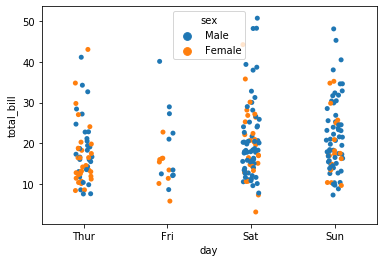

In [42]:
# STRIP PLOT - Add HUE argument
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex')
#Lets SPLIT the HUE colors below

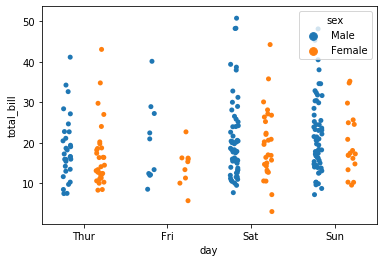

In [47]:
# STRIP PLOT - Add SPLIT argument
   #SPLIT command renamed to DODGE-but SPLIT still works
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True)


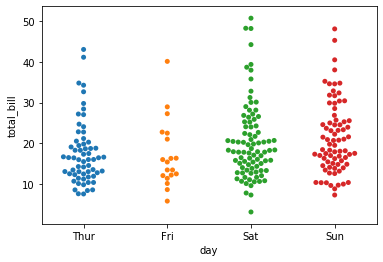

In [48]:
# SWARM PLOT
 #A combination of Violin Plot and Strip Plot. Shows the same 
 #distribution except it shows all the points themselves.
 #X-Categorical
 #Y-Numerical
 #DONT USE FOR VERY LARGE DATASETS(AT LEAST NOT RECOMMENDED)
 #Very similar to STRIP PLOT except the points are adjusted so 
  #that they don't overlap. Gives better representation of 
  #distribution of values. Kind of like combining a Scatter Plot- 
    #Strip Plot with a Violin Plot 
#One drawback of Swarm Plot is sometimes they don't scale well to
 #very large numbers both in terms of ability to show all the 
 #points. Sometimes points go way too wide since you don't want to
 #stack anything on top of each other. Also takes a lot of 
 #computation to begin to arrange them. So don't use for large
 #datasets
sns.swarmplot(x='day',y='total_bill',data=tips)

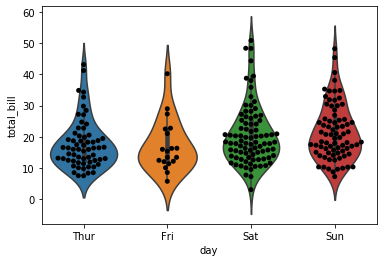

In [49]:
# We can combine SWARM PLOT with VIOLIN PLOT to show both pieces 
 #of info stacked on top of each other
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')
#We can see every single point and corresponding KDE plot on top
  # of it
#Not very useful for presenation but more for exploratory data
  #analysis 

/Users/thomascoenen/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


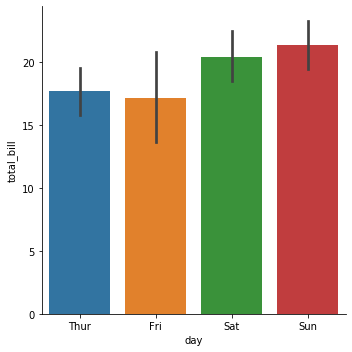

In [50]:
# FACTOR PLOT
 # this has been RENAMED to CATPLOT
 # The most general form of all these plots
 #X-Categorical
 #Y-Numerical
 #Hue-
 #Kind - what describes factor plot itself
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')
# Creates a BARPLOT bases off those categories

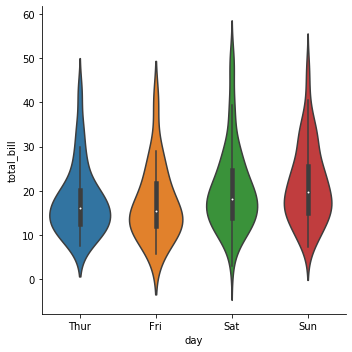

In [51]:
# FACTOR PLOT - can even recreate other plots
# Use Factor Plot to make a Violin Plot
sns.factorplot(x='day',y='total_bill',data=tips,kind='violin')
#BETTER TO CALL PLOT ITSELF. THIS IS JUST A GENERAL METHOD

Video 3 - Matrix Plots

We will learn to create Matrix Plots, primarily HEAT-MAPS using 
  seaborn

In [ ]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')  #already loaded above

In [52]:
# Load new dataset
flights = sns.load_dataset('flights')
#shows num of passengers that flew in a given month and year

In [53]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


# HEAT MAPS - primary way to show some sort of MATRIX PLOT
 #In order for heat map to work properly data must be in a 
  #MATRIX FORM. What we mean by MATRIX FORM is that the index 
  #name and column name match up so the cell value indicates 
  #something that is relevant to both of those names
#For example when looking at TIPS dataframe we see for ex 
#'total_bill' column and it's corrsponding values for the ROW,
#we see the Row is NOT a VARIABLE, instead it's an INDEX.
#In Order for Matrix Form to work we need to have VARIABLES ON
#COLUMNS AND ROWS

In [ ]:
#So we need variables on columns and rows. Can be done with many
 #methods, usually through: 1- PIVOT TABLE 
  #                         2- CORRELATION DATA. 
#We will do CORRELATION DATA first

In [58]:
# CORRELATION DATA METHOD
  #This is the matrix form we will need data in to call HeatMap
tips.corr()
# Now we have a MATRIX FORM of some sort of data. What we mean
 # by this is now the COLUMN and INDEX variable names actually
    #indicates a relevancy to both the column and index name 
    #for cell they match up

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [59]:
#save tips.corr() as a new variable 'tc'
tc=tips.corr() 

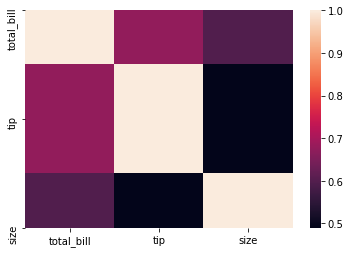

In [60]:
# HEATMAP
 #allows you to easily tell how well values correlate
 #HeatMap colors in values based on some sort of gradient scale
 #so it sets numbers in 'corr map' made above (tc) to gradient
 #on a color scale and fills them in
#Argument: ANNOTATION - shows numerical values 
#Argument: CMAP- can show which color we want
 #inside blocks or cells
sns.heatmap(tc)

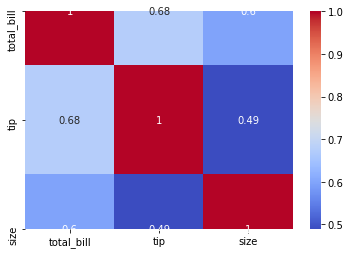

In [63]:
#HEATMAP with ANNOTATION and COOLWARM
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [64]:
# Lets visualize Flights data and put in MATRIX FORM
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [ ]:
# So for Flights data we want to get in Matrix Form. To do this 
#we want to turn one of the Column Names into a ROW. We will
#choose MONTH to be the INDEX. Use PIVOT TABLE METHOD

In [65]:
# PIVOT TABLE METHOD
  #Make: Index='month', Columns='year', Values='passengers'
  #CMAP-shows different color types
  #LINEWIDTHS-separates the blocks-makes easier to read
  #LINECOLOR-What you want whitespace(the separation part for
     #LINEWIDTHS (above part) to be)
flights.pivot_table(index='month',columns='year',values='passengers')
# Now we have data in MATRIX FORM
# Now can use HeatMap to visualize data

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [66]:
#Set pivot table to a variable (fp)
fp = flights.pivot_table(index='month',columns='year',values='passengers')

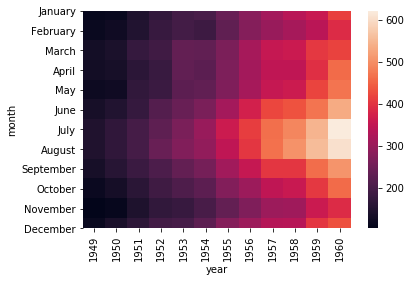

In [74]:
#HEATMAP for flights DF
sns.heatmap(fp)
#Now we can easily tell which month of which year had most 
   #flights. Makes sense bc as time goes on more flights happen

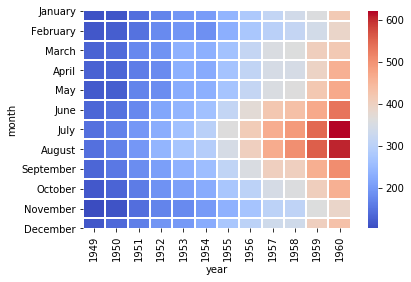

In [76]:
#HEATMAP for flights DF with CMAP, LINECOLOR, LINEWIDTH
sns.heatmap(fp,cmap='coolwarm',linecolor='white',linewidth=1)

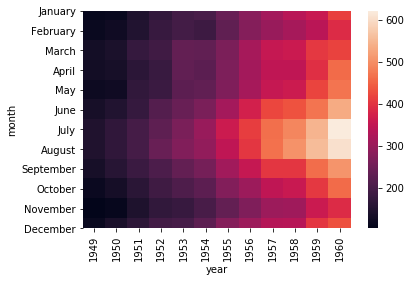

In [78]:
# Just original heatmap for comparison:
sns.heatmap(fp)

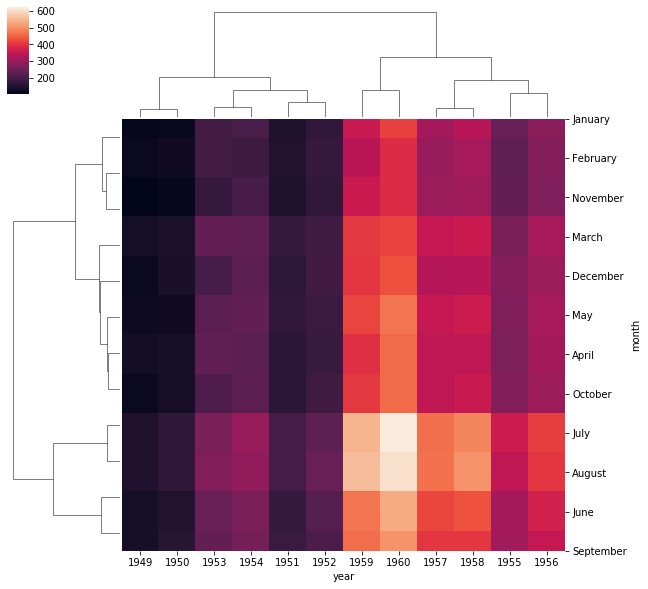

In [80]:
# CLUSTERMAP
 #CLUSTERS most similar data and put them together
 #CMAP-for colors
 #STANDARD SCALE-normalizes scale from 0-1
 #Second Matrix Type Plot in Seaborn
 #CLUSTERMAP uses HEIARCHEL CLUSTERING to produce a clustered
  #version of the heatmap
 
 #Plots little Heirachel clusters at the top and these try to 
#cluster columns and rows together based off their similarilty. 
#Essentially shows the years and the months in clusters and the 
#months on the Y-axis are no longer in order. Reason for that is 
#they have been clustered to most similiar months being put 
#together. Does same thing for years as they are out of order 
#to. So it clusters info to try and show columns and rows that 
#are similar to each other. So we see 1959 and 1960 are very 
#similar to each other and so are August and July. We can see 
#different levels of heirarchy of clusters based off the tree 
#diagrams on Y and X axis
sns.clustermap(fp)
# So we now can begin to infer infomation 

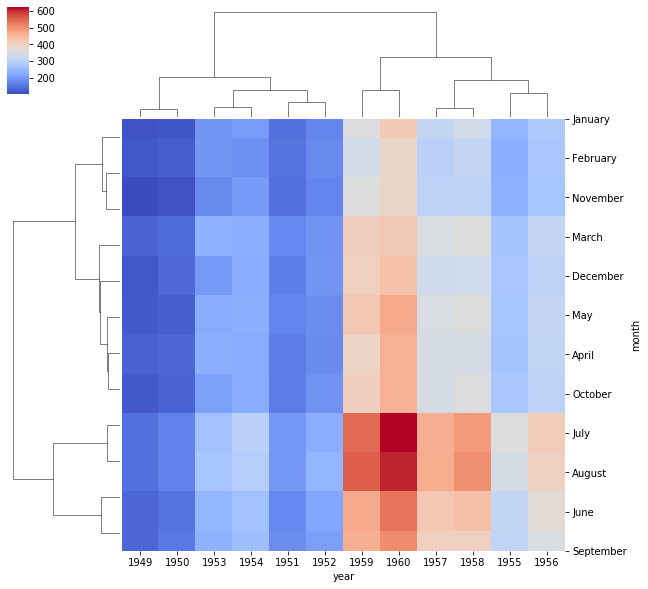

In [81]:
# CLUSTERMAP with Flights- CMAP
sns.clustermap(fp,cmap='coolwarm')
#now we can see clusters better like in Aug and Jul more clear

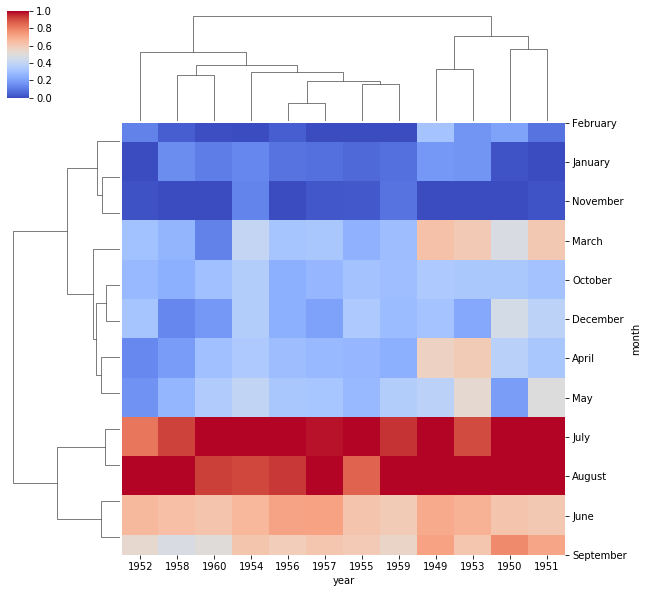

In [82]:
# CLUSTERMAP with Flights- STANDARD SCALE
# Right now scale is on 'passengers' from 0-600 but we can
   #normalize by seeting Standard_Scale=1
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)
#Now we can REALLY SEE based off a NORMALIZED SCALE the 
  #similarity of the clusters based on coloring.
#So Nov,Jan,Feb are much closer to low passengers and high 
 #passenger count is in summer months

In [ ]:
# Video 4 - GRIDS

In [ ]:
# Use Seaborn Grids capability to automate subplots based off 
  # features in our data

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
#Load new dataset from notebook
#Show measurments of different iris flowers and species with
   # 3 distinct kinds of species. Other 4 columns are just 
     # features of the data
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [87]:
#check out unique values for species
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

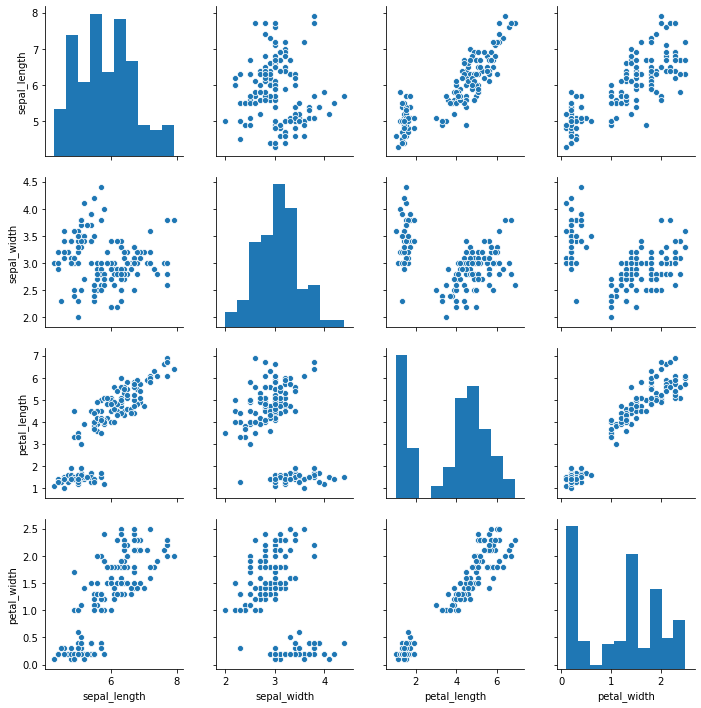

In [88]:
# PAIR PLOT
#PAIR PLOT is the automated JOINT PLOT for entire dataset
sns.pairplot(iris)   
#Using Seaborn PAIRGRID mechanism we can customize this 
 #PAIRPLOT with a lot more control 

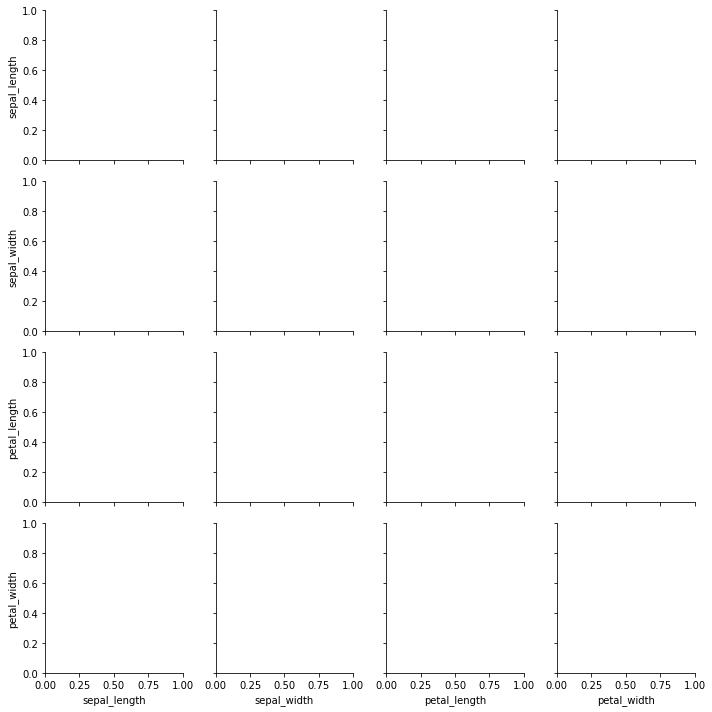

In [90]:
#PAIRGRID
 #Takes all numerical columns and grids them up making these
  #subplots for us
 #Gives us an EMPTY PAIRGRID
 #PAIRPLOT is just a simplified version of PAIRGRID
 #PAIRGRID you have more control over what you want but have to
     #do more work for it
sns.PairGrid(iris)

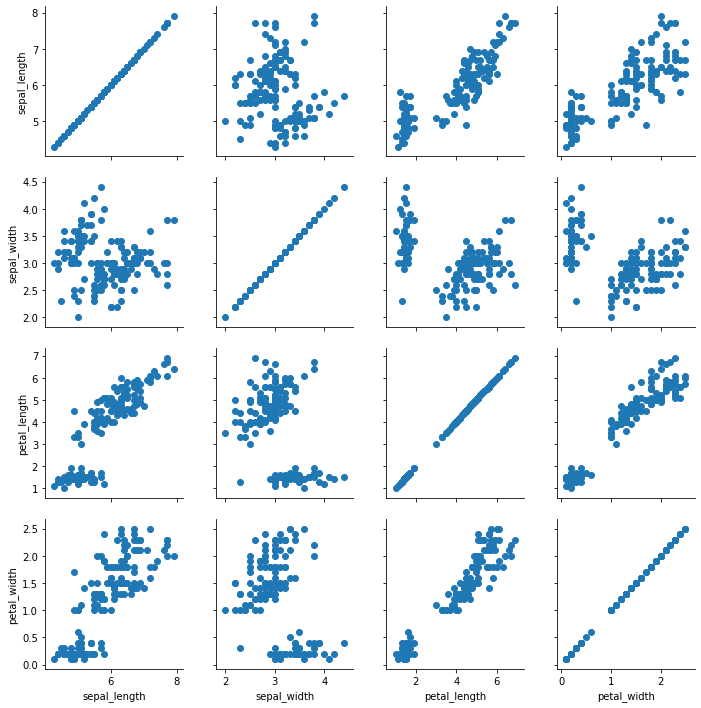

In [93]:
#PAIRGRID 
 #First set PAIRGRID equal to a variable
g = sns.PairGrid(iris)
 #MAP- off the variable we can MAP plots types. So if we want to
  #map a SCATTERPLOT it will map a SCATTERPLOT. Can do it on
    # differnt parts
g.map(plt.scatter)

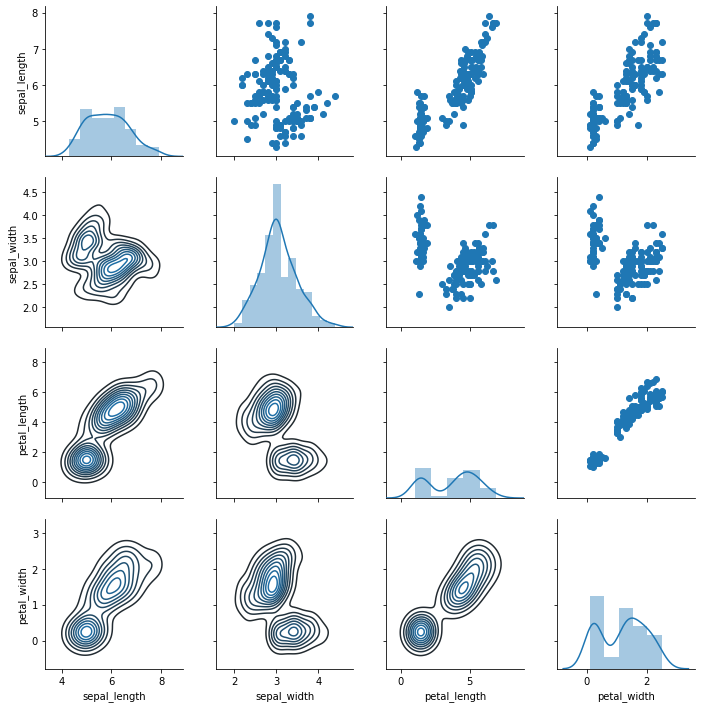

In [101]:
g = sns.PairGrid(iris)
# Specify what you want on Diagonal,Upper Half, and Lower Half
#MAP a DISTPLOT on DIAGONAL
g.map_diag(sns.distplot)
#MAP SCATTER PLOT on UPPER
g.map_upper(plt.scatter)
#MAP KDE PLOT on LOWER
g.map_lower(sns.kdeplot)

#Now we can see we have much more control over it by choosing 
  #which plot types we want to map

In [102]:
# FACET GRID

#Load 'tips' dataset for this - already done
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


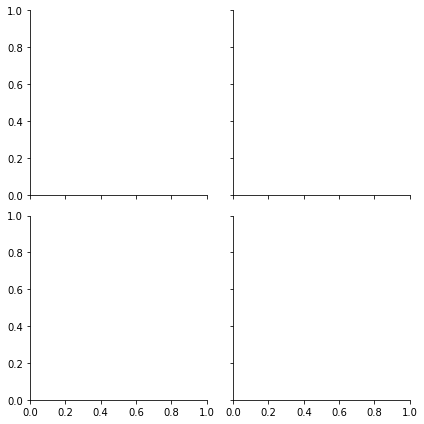

In [103]:
# FACET GRID
 #similar to SUBPLOTS from MatPlotLib except for numbers we pass
 # in column and row names from our DF
g = sns.FacetGrid(data=tips,col='time',row='smoker')
# Gives us an EMPTY GRID
# We can MAP plot types to this grid

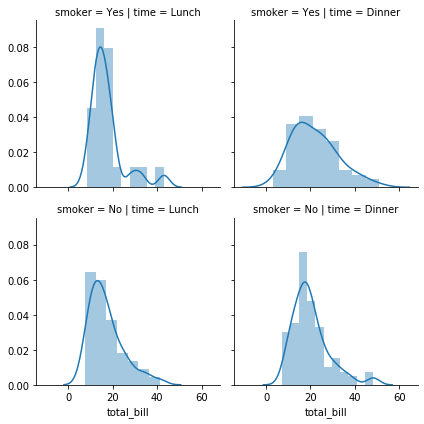

In [107]:
# FACET GRID - MAP
#Create out FACET GRID
g = sns.FacetGrid(data=tips,col='time',row='smoker')

#MAP Argument we want to MAP to:
g.map(sns.distplot,'total_bill')
# So 3 ARGUMENTS at play here: Row and Column names we want to
  #separate by for FACET GRID, and then when MAPPING we want to
  #add one more argument for what we actually want to display
# So we are mapping a PLOT TYPE(DIST PLOT) with 'total bill' 
#and separating the results based off the results by column and 
#row, and certain column names ('time' and 'smoker')

# X-ax-'total bill'
# ROWS - Yes and No on 'smoker'
    # Top Row - smoker=YES, Bottom Row - smoker=NA
# COLUMNS - Time of Lunch vs Dinner  
    #Left Column-Lunch, Right Column-Dinner
# Then of course DISTRIBUTION PLOT for TotalBill

In [ ]:
#If you're trying to MAP a plot type that needs more that one 
 #argument (above example we used DIST PLOT which only needs 
 #one argument) for example SCATTER PLOT-we get TYPE ERROR
# So all you have to do if simply add the additional argument
  #in the MAP call

TypeError: scatter() missing 1 required positional argument: 'y'

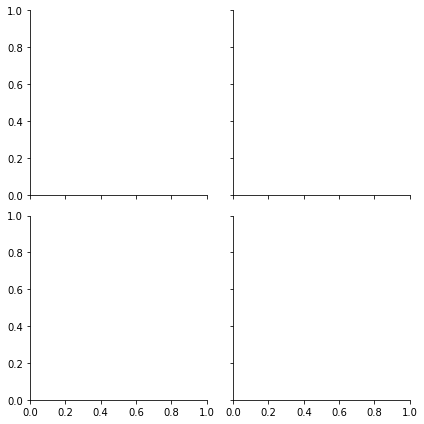

In [111]:
# FACET GRID - ADDING MORE ARUGMENTS 
# As we see we get an ERROR- we must pass in ADDITIONAL ARGUMENT
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill')

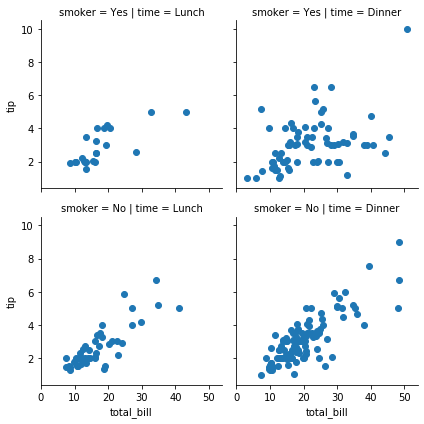

In [112]:
# FACET GRID - ADDING MORE ARUGMENTS 
 #Add in 'tip' vs 'total' bill and do SCATTER PLOT
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')
# Now we have 'tip' vs 'total bill' and we have separated off
  #row-smokers(yes or no) and columns-time(lunch or dinner)

# Video 5 - REGRESSION PLOTS

# Seaborn has many built in capabilities for Regression Plots 
 #but we won't discuss Regression until the Machine Learning part
 #of the course. 
#For now we will only cover the LM PLOT Function

In [ ]:
# LM PLOT FUNCTION
  #LM PLOT allows you to display Linear Models with seaborn
    #We will also learn how to size and change the aspect 
     #ratio for seaborn plots

In [115]:
#Load previous dataset
# import seaborn as sns
# %matplotlib inline
# tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


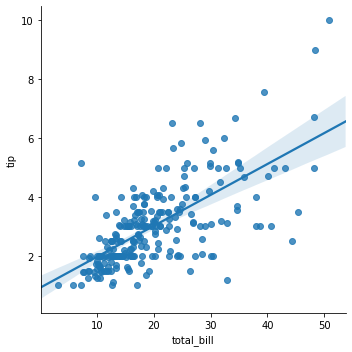

In [116]:
# LM PLOT - Build a simple Linear Model Plot
  # Gives us SCATTERPLOT with a LINEAR fit on it
# X-totalbill
# Y-tip
# data-tips
# HUE-gives separation based off CATEGORICAL FEATURE - gives
  # you another Linear fit
# We can Pass in MatPlotLib Style parameters such as if we 
 #wanted to affect the marker and marker types. 
#
sns.lmplot(x='total_bill',y='tip',data=tips)

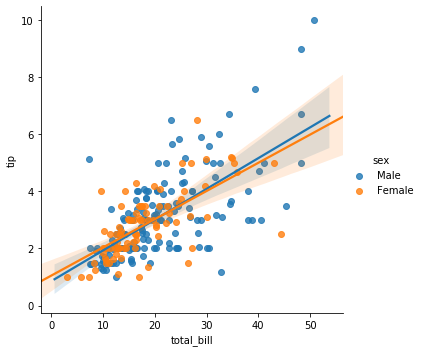

In [117]:
# LM PLOT - HUE
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')
# Now we essentially have 2 SCATTER PLOTS and 2 LINEAR FITS
# So we see male and female have same linear fit of total
   #bill vs fit

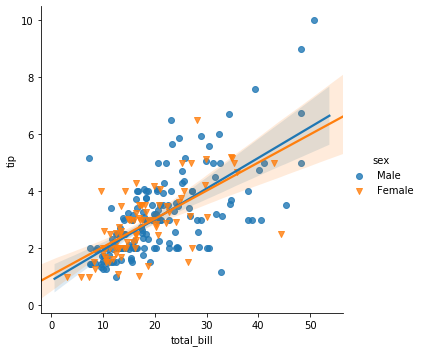

In [118]:
# LM PLOT - Use MatPlotLib Type functions to edit
#since we have HUE need to pass in 2 marker types
   # these symbols come from MPL marker symbols
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'])

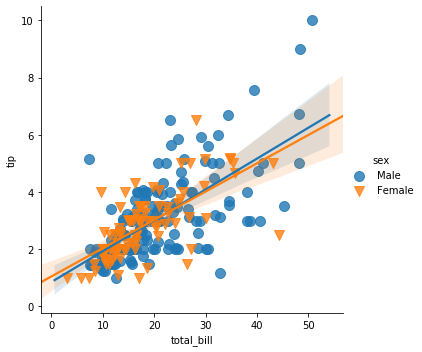

In [120]:
# LM PLOT - Add a Scatter_KWS Parameter
# So this is just a call to MPL. In other words just pass in a 
  # dict with base MPL arguments. In this case it is 's' for 
    # size of SCATTERPLOT.
# so we can pass in MPL parameters even more directly into the 
  # plt.scatter call. So Seaborn with the LMPLOT is actually 
    #calling MPL under the hood. If we want to affect MPL 
    #directly from Seaborn(reference documentation). What we 
    #end up doing if we want to affect SCATTER PLOT pass in a 
    #DICTIONARY
#SCATTER KWS will affect size of the MARKER
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':100})
#so markers are a lot bigger
# Generally won't remember stuff like this so will have to
  # reference Documentation.
# Probalby won't be customizing to this degree that often with 
   #Seaborn

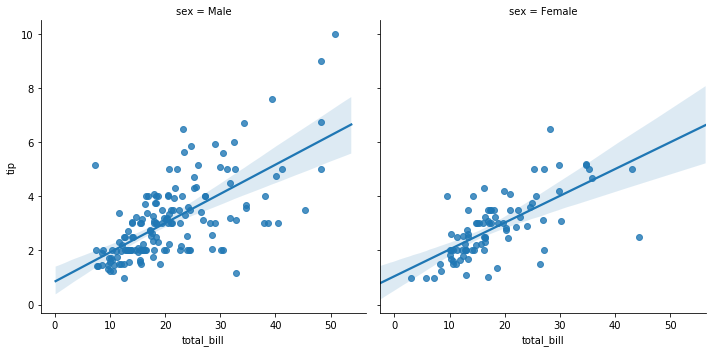

In [121]:
# LM PLOT - GRID(col)
# Can use a GRID instead of separating by HUE
# So instead of separtaing by color (HUE) we separate by COLUMN
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')
# Now we have 2 different columns separated by 
    #'sex' - Male and Female

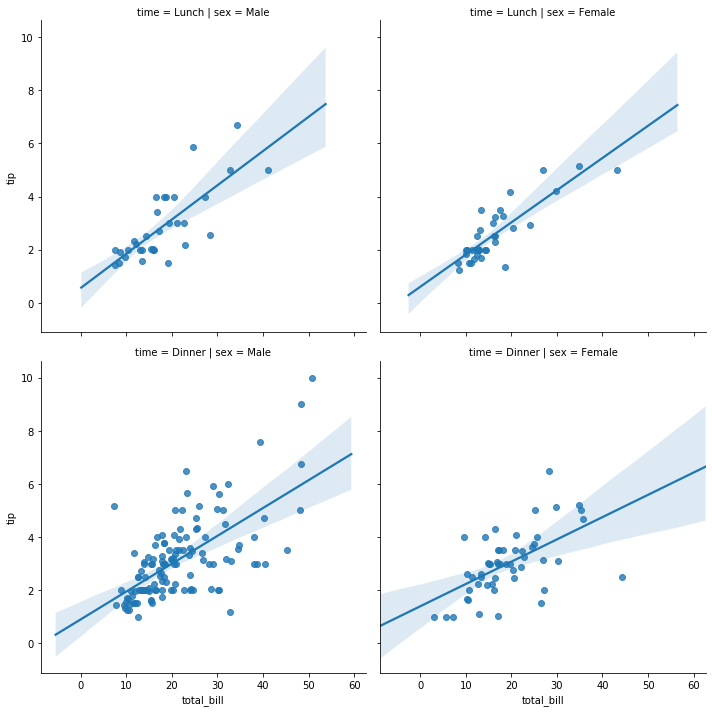

In [122]:
# LM PLOT - GRID(col and row)
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time')
#This is essentially just doing the grid calls and the facet 
#grid calls we learned earlier in GRID LECTURE but more 
#AUTOMATIC bc you are just adding COL and ROW to the LM PLOT 
#call so it's easier. This way we don't have to deal with FACET 
#GRID all the time. 
#If we want to plot more variables we can add HUE back in

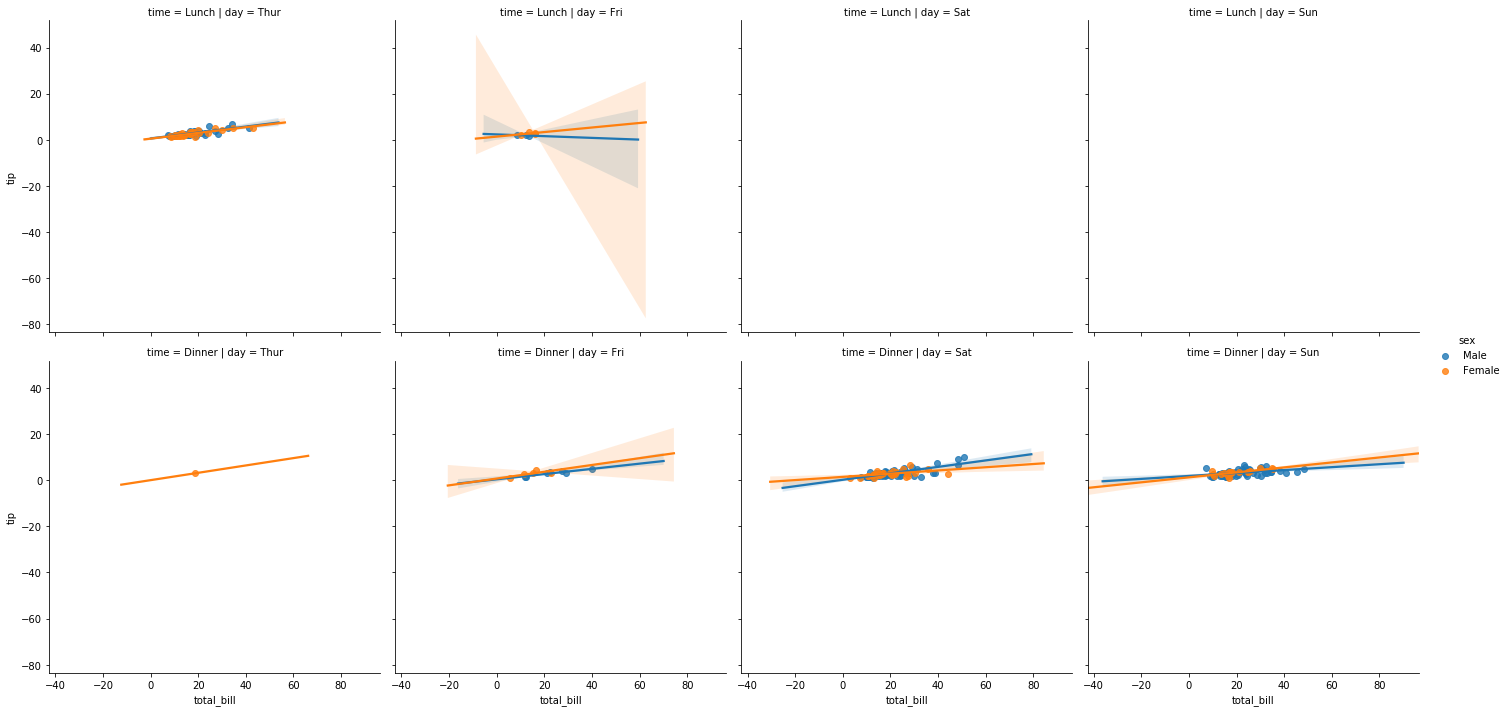

In [123]:
# LM PLOT - GRID(col and row) - with HUE
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='time',hue='sex')
# Gives us informative plot but with a LOT of INFO so we 
  #probably want to eliminate row and get one ROW back

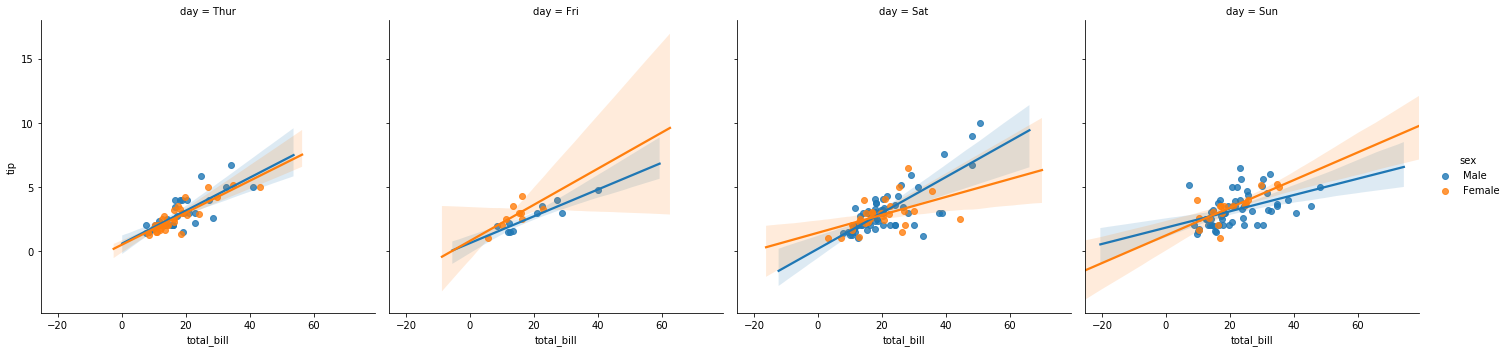

In [124]:
# LM PLOT - GRID(col and row) - with HUE
#eliminate the row
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex')
#Aspect and Size look bad
#Seaborn figures can have aspect and size ration adjusted 
 #with size and aspect parameters

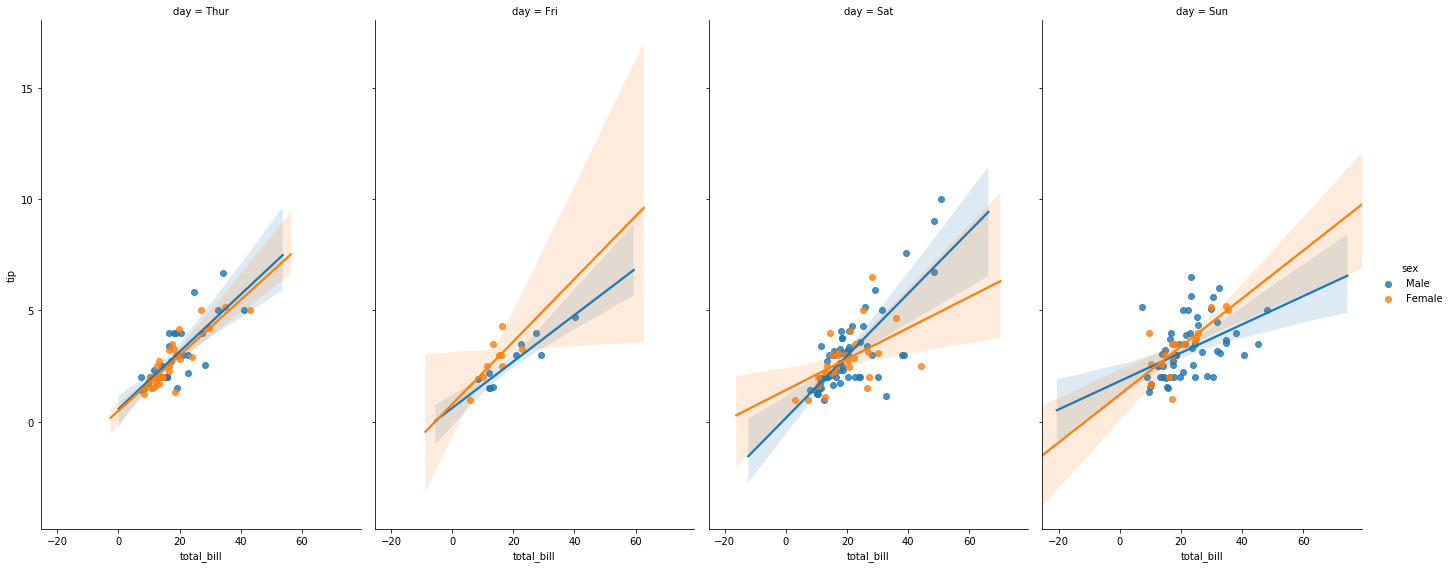

In [126]:
#LM-PLOT - SIZE and ASPECT ratio adjusted
# Aspect-ratio between height and width of each grid
# Size -
   #SIZE been renamed to HEIGHT
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',
          aspect=0.6,size=8)

# Video 6 - STYLE and COLOR

In [ ]:
#already done
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')

In [127]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


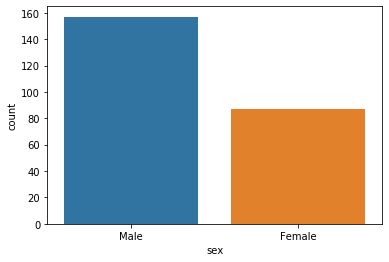

In [129]:
sns.countplot(x='sex',data=tips)

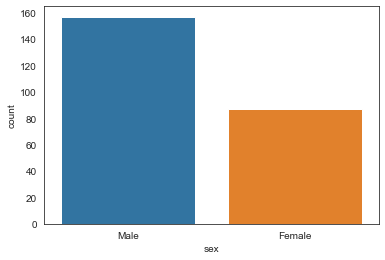

In [147]:
#SET STYLE - How to set particular STYLES
#if you delete set_style it still will stay in place until 
#you set a new style so you don't need to have it on every line
#Seaborn has a SET STYLE ARGUMENT which allows you to set the 
 #style of the rest of your plots
#Passing in white will create a blank 'white' background
sns.set_style('white')
sns.countplot(x='sex',data=tips)
#Passing in TICKS will give us TICKS at edge of box



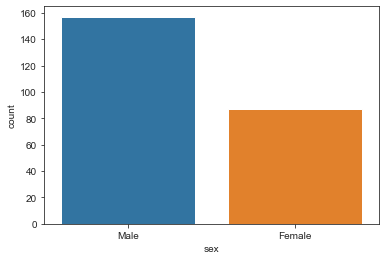

In [146]:
#TICKS - will give us TICKS at edge of box
# DIDNT WORK ?????
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

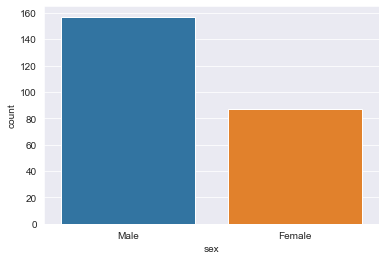

In [148]:
# DARKGRID - gives you the original DARK GRID Background
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)

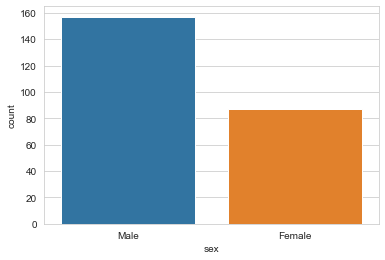

In [149]:
# WHITEGRID
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

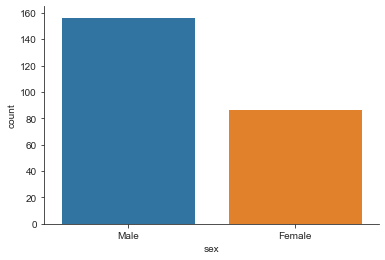

In [161]:
# REMOVE SPINES- DESPINE- Remove top spine and right spine 
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()

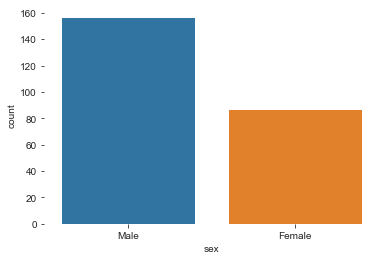

In [162]:
# REMOVE SPINES - Remove bottom or left Spine
   # By default top and right spines get removed. for bottom 
     #and left must add these in as parameters
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True)

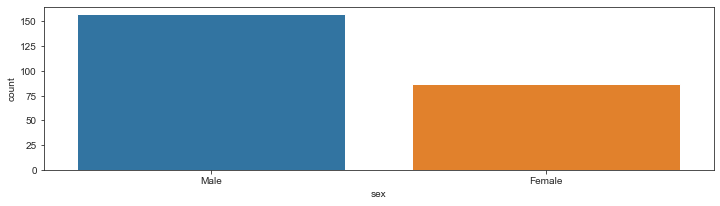

In [164]:
# SIZE and ASPECT
#We can use MPL FIGURE SIZE and MPL APECT RATIO in combination 
  #with seaborn
 #We can use MPL PLT figure Figsize width and height to change
#the size of most seaborn plots since they are all just 
#basic callbacks to MPL and you can also control the size and
#aspect ratio of most seaborn grid plots by passing in 
#parameters size and aspects
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

# SCALE and CONTEXT
 #Seaborn comes with a convenient set of SET_CONTEXT which
 #allows you to overide default parameters and change font 
 #scales depending on what we are creating figure for

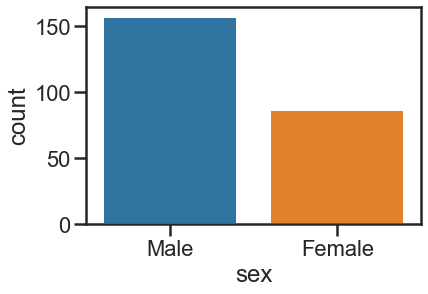

In [167]:
# SET_CONTEXT  - POSTER
#Context parameters: paper,notebook(default one),talk,poster
#Context-'str'
#Font Scale-number
#Lets say we are creating this figure not for a notebook but
  #for a poster
sns.set_context('poster')
sns.countplot(x='sex',data=tips)
# So poster gives us a larger figure and font is larger

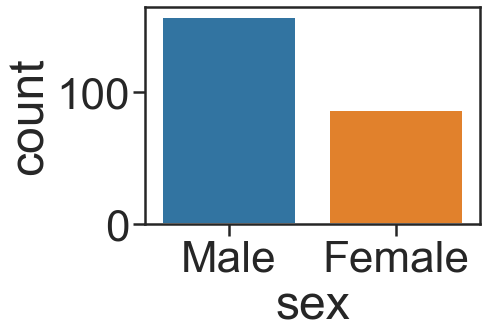

In [169]:
# SET_CONTEXT - Change Font
sns.set_context('poster',font_scale=2)
sns.countplot(x='sex',data=tips)

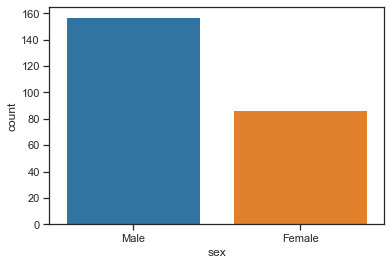

In [171]:
# SET_CONTEXT - NOTEBOOK
#Can SET CONTEXT to whatever we want figure to be in. Default 
 #is in context of notebook
sns.set_context('notebook')
sns.countplot(x='sex',data=tips)

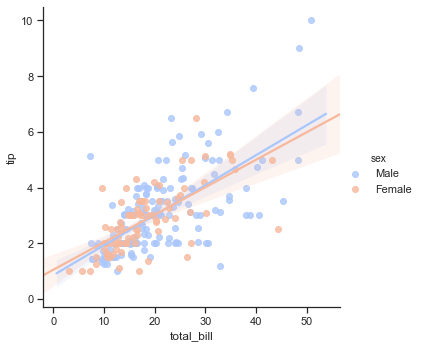

In [174]:
# PALLETS and COLORS
# Previously we had plots that specified a HUE parameter
 # this chooses the color for us
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

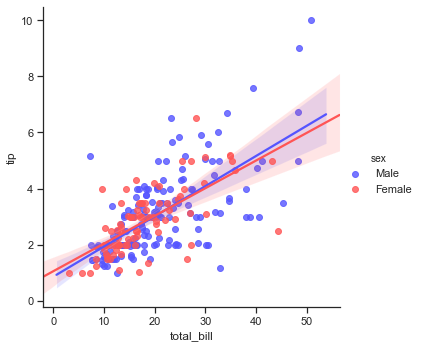

In [175]:
# COLORS - Change to Seismic
# Find colors by going to MPL 'color' page
 #google-matplotlib colormap-choose seismic diverging colormap
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')